**Plotting pivot tables and exploring data**
--------------------------------------------

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 100

import numpy as np
import time
import datetime 

from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
%matplotlib inline
import matplotlib.pyplot as plt

from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("Inputs/HR_comma_sep.csv")

# Any results you write to the current directory are saved as output.

First we can simply describe the variables, and look at their means/standard deviations, and normal quintiles. 

In [2]:
df.columns =     ['satisfaction_level', 
                  'last_evaluation', 
                  'number_project',
                  'average_montly_hours', 
                  'time_spend_company', 
                  'Work_accident', 
                  'left',
                  'promotion_last_5years', 
                  'department', 
                  'salary']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [3]:
df['dept_index'] = df['department']

department_groups = {'sales': 1, 
                     'marketing': 2, 
                     'product_mng': 3, 
                     'technical': 4, 
                     'IT': 5, 
                     'RandD': 6, 
                     'accounting': 7, 
                     'hr': 8, 
                     'support': 8, 
                     'management': 9 
                    }
df['dept_index'] = df.department.map(department_groups)
salary_groups = {'low': 0, 'medium': 1, 'high': 2}
df['salary_index']=df['salary']
df.salary_index = df.salary.map(salary_groups)

#
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'dept_index',
       'salary_index'],
      dtype='object')

Then we can plot a few pivot tables to look at the data and colormap them according to the values. 

In [4]:
df_jobtype = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['department'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype.style.background_gradient(cmap=cm)

In [5]:
df_jobtype_salary = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['department', 'salary'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')
cm = sns.light_palette("green", as_cmap=True)
df_jobtype_salary.style.background_gradient(cmap=cm)

In [6]:
df_jobtype_salary_prom = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['department','promotion_last_5years', 'salary'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype_salary_prom.style.background_gradient(cmap=cm)

In [7]:
df_jobtype_prom = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['department','promotion_last_5years'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype_prom.style.background_gradient(cmap=cm)

In [8]:
df_jobtype_salary_time = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['department','time_spend_company', 'salary'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')
cm = sns.light_palette("green", as_cmap=True)
df_jobtype_salary_time.style.background_gradient(cmap=cm)

We can now plot various plots and start seeing some trends in the data. 

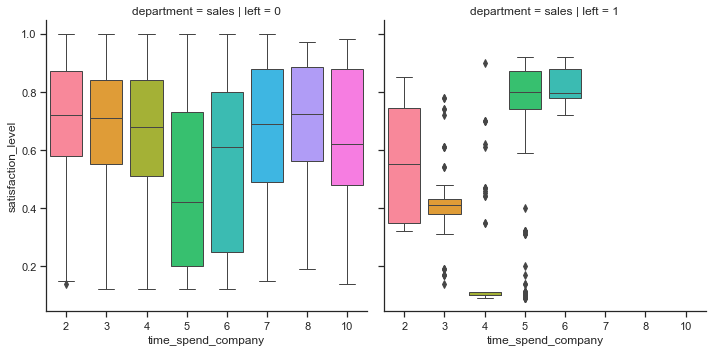

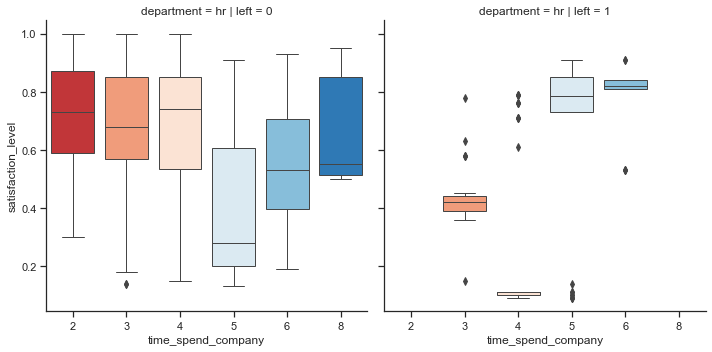

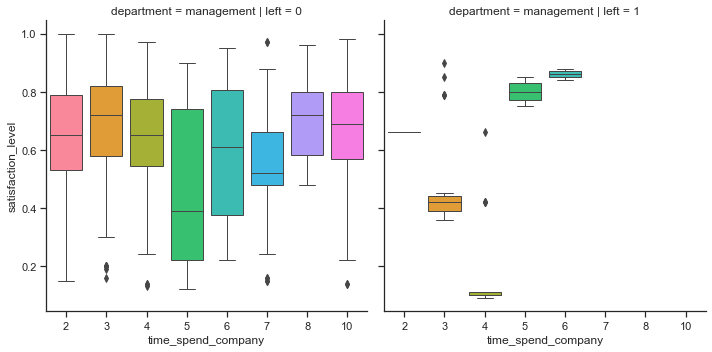

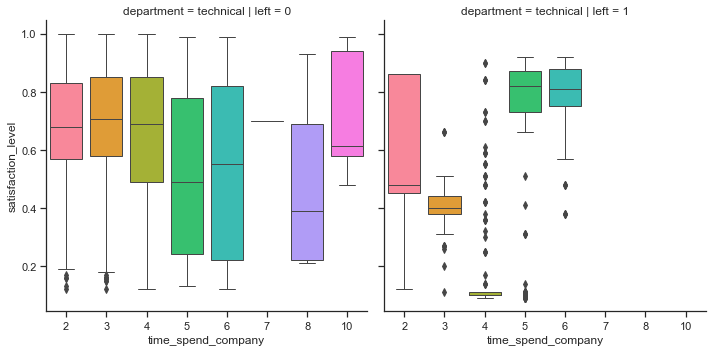

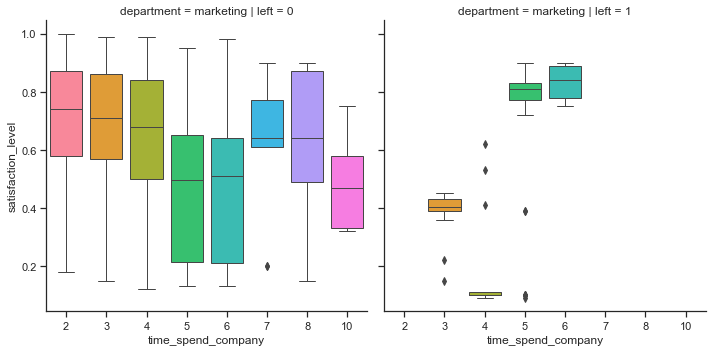

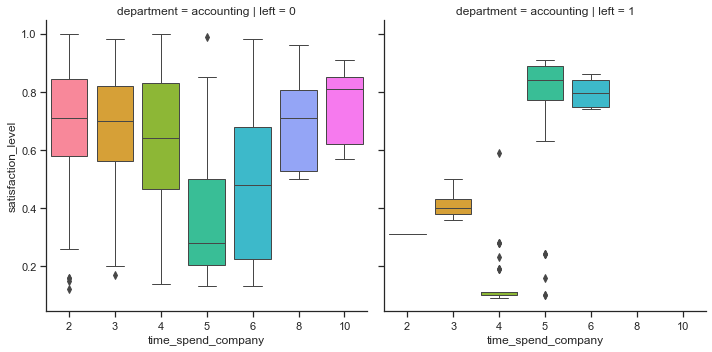

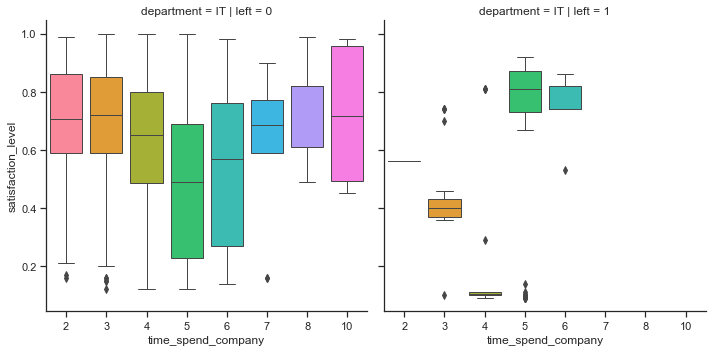

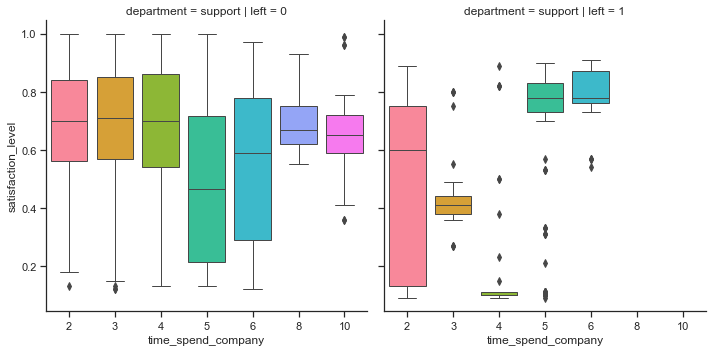

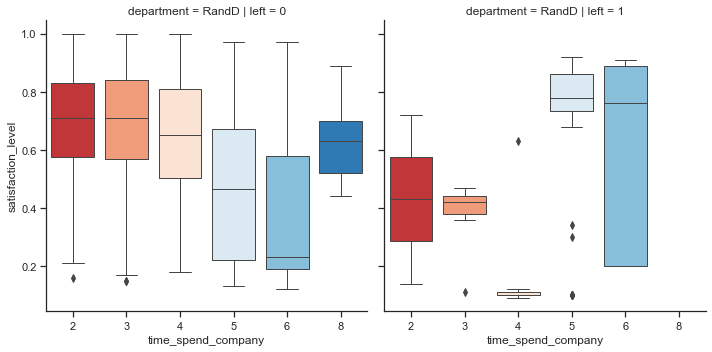

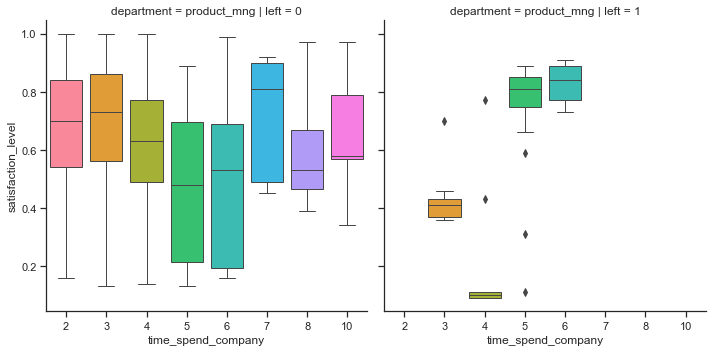

In [9]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='time_spend_company', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'left', row = 'department',
                   ci=None, aspect=1, linewidth=1) 

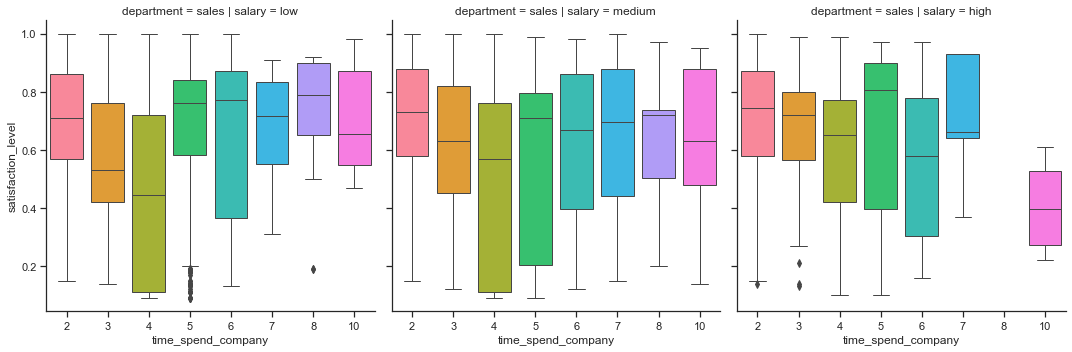

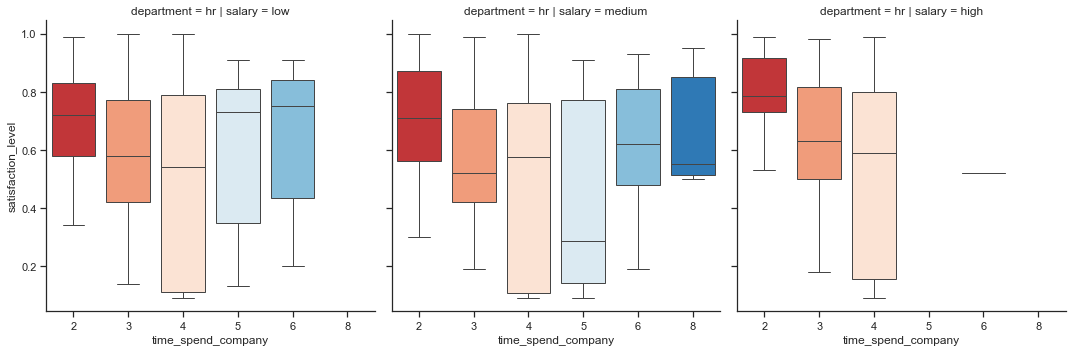

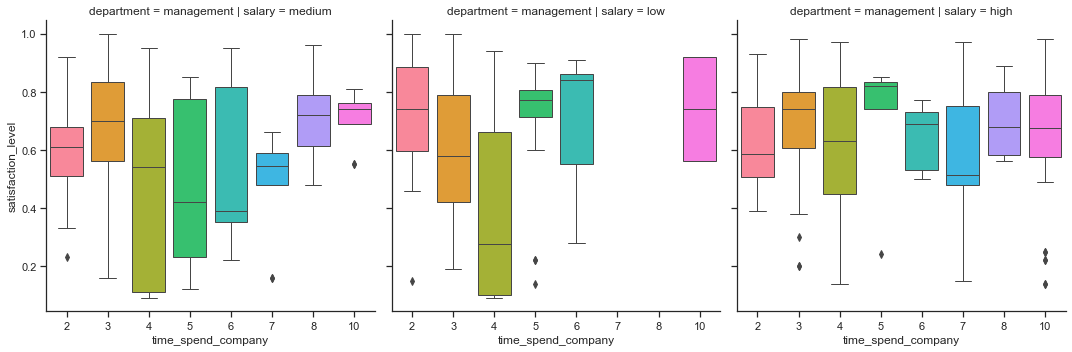

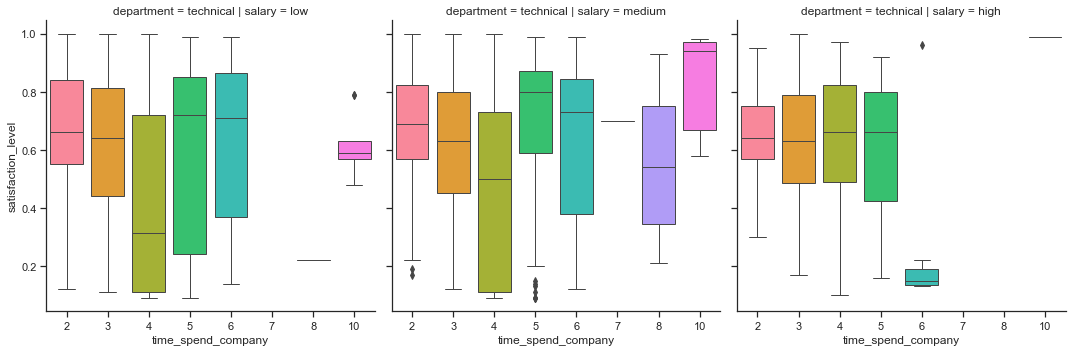

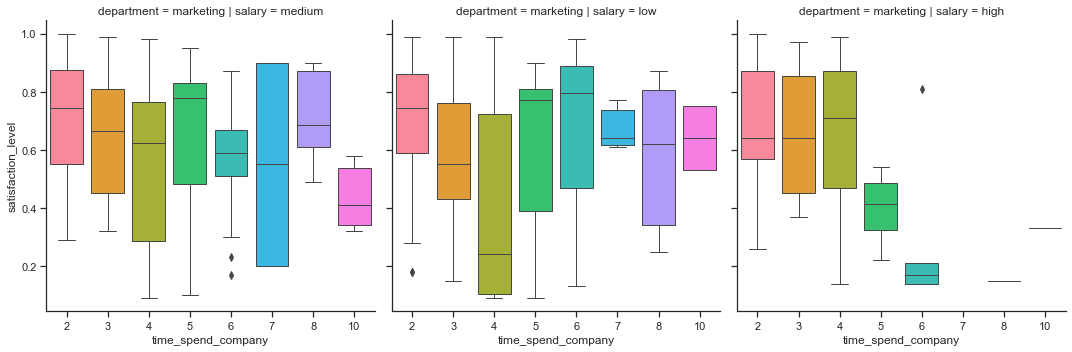

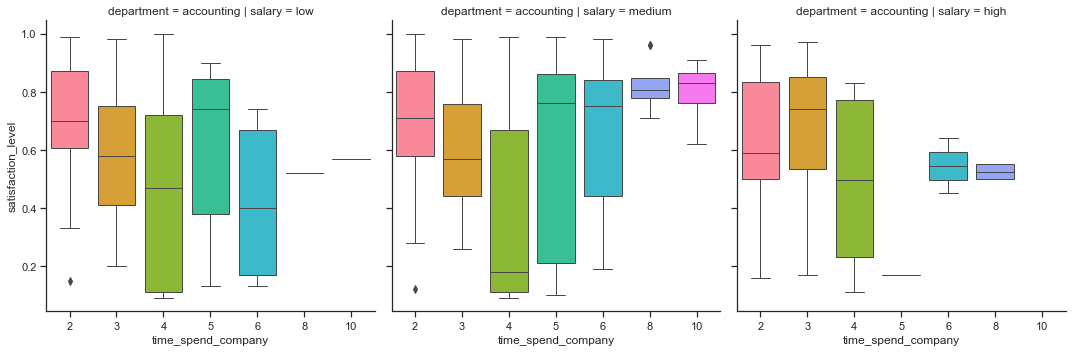

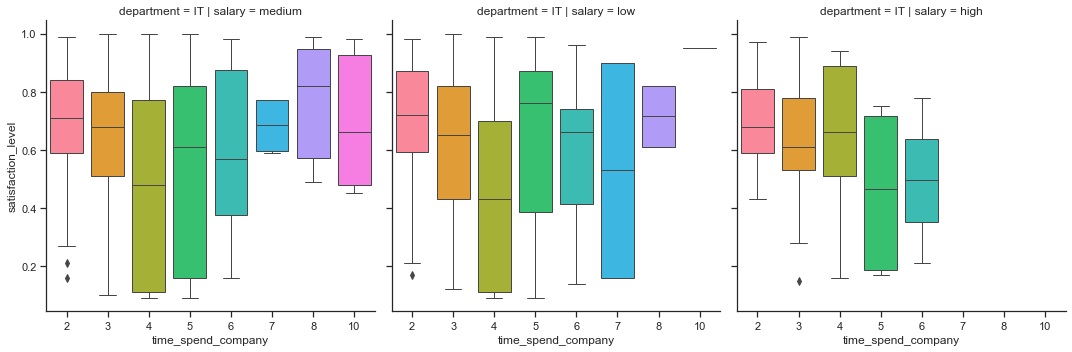

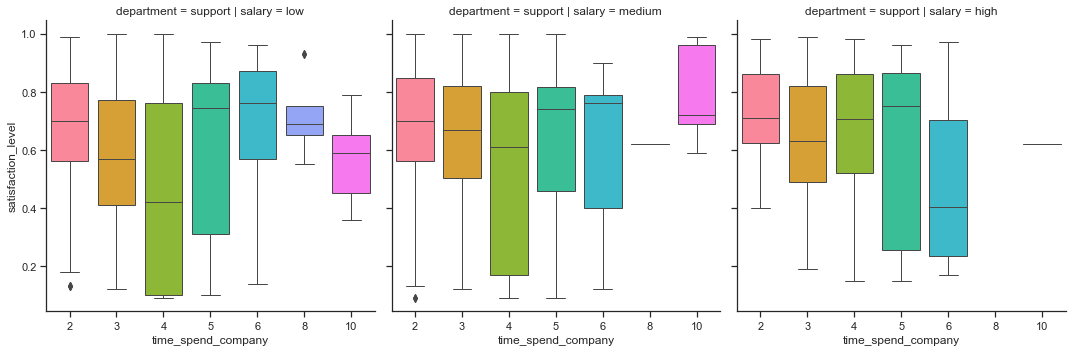

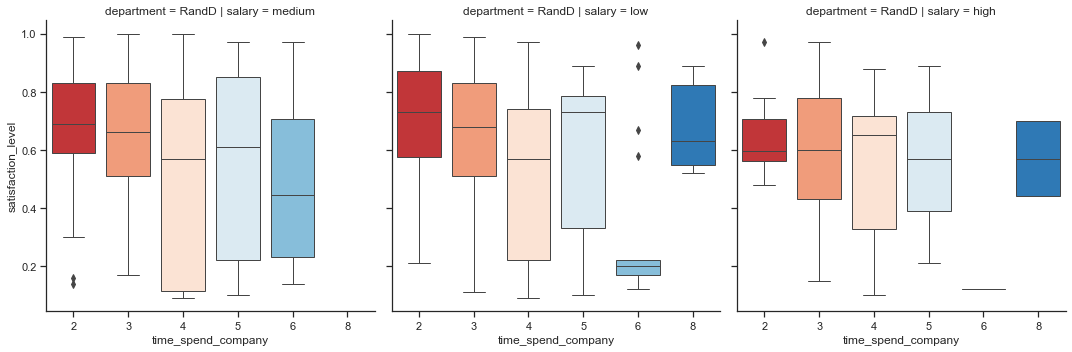

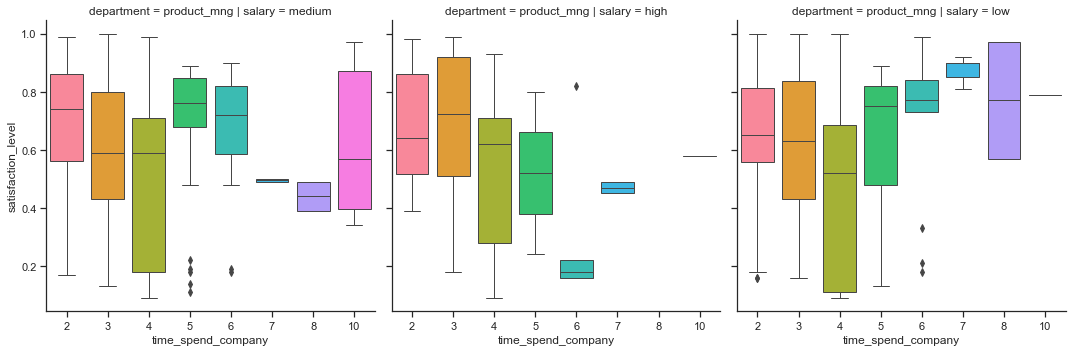

In [10]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='time_spend_company', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'salary', row='department', 
                   ci=None, aspect=1, linewidth=1) 

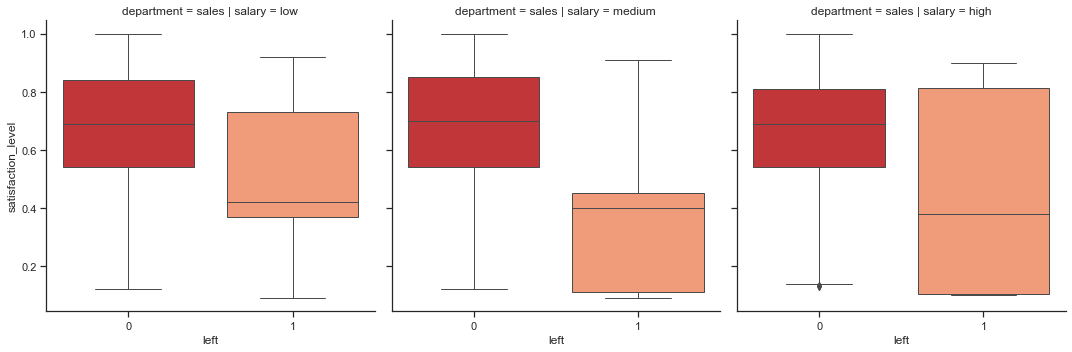

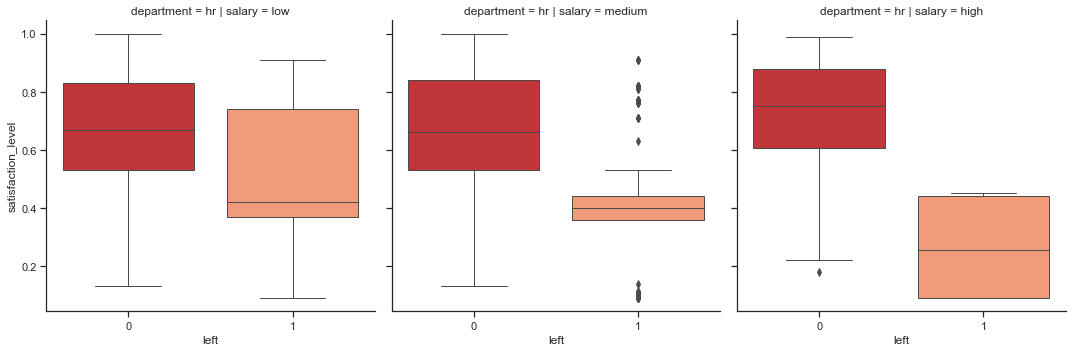

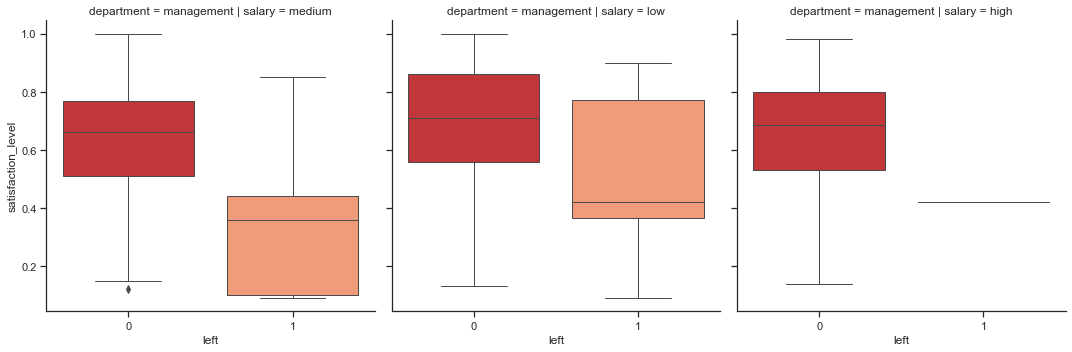

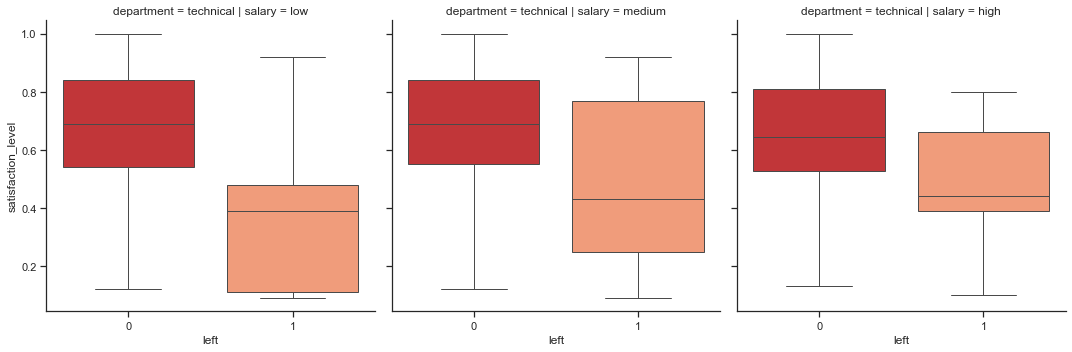

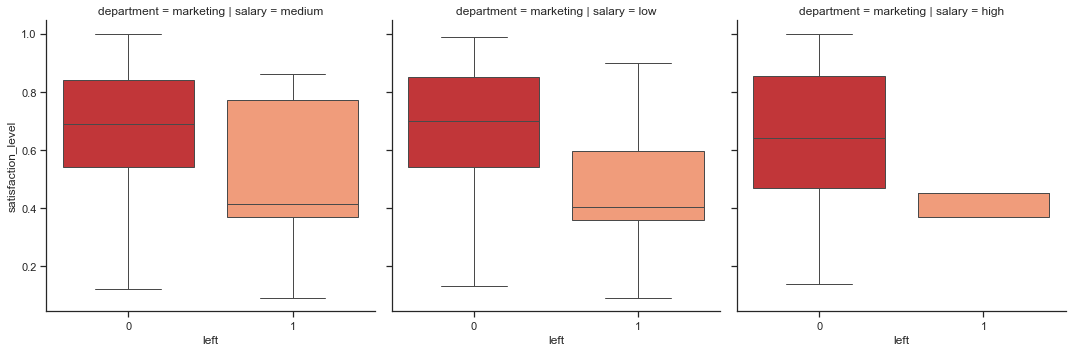

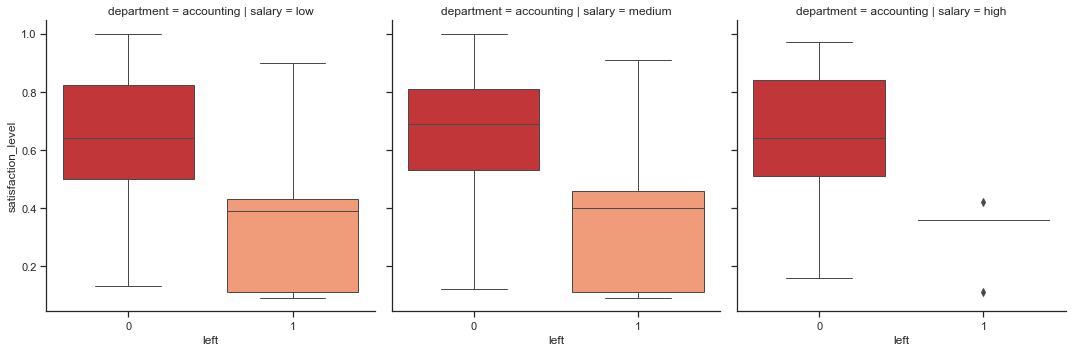

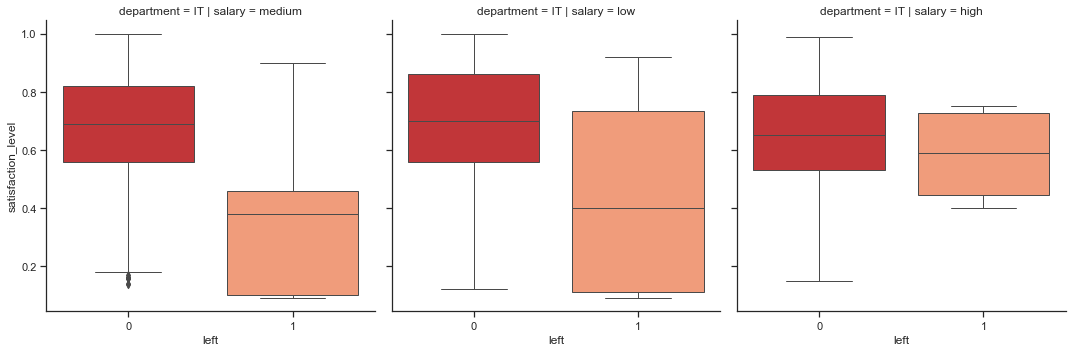

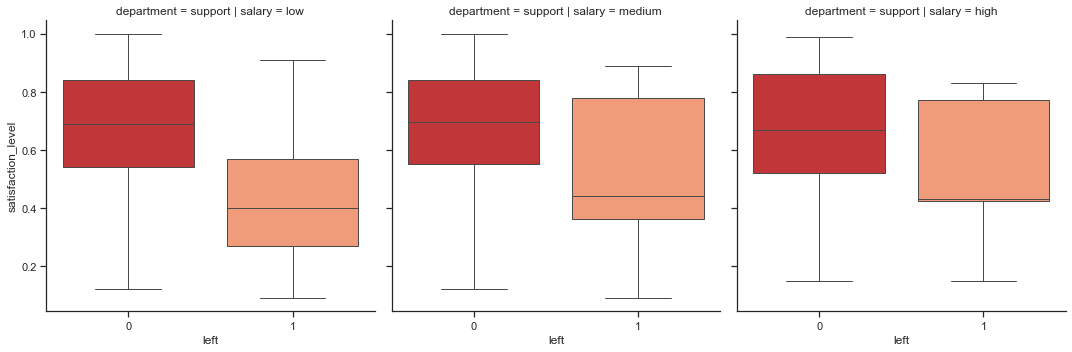

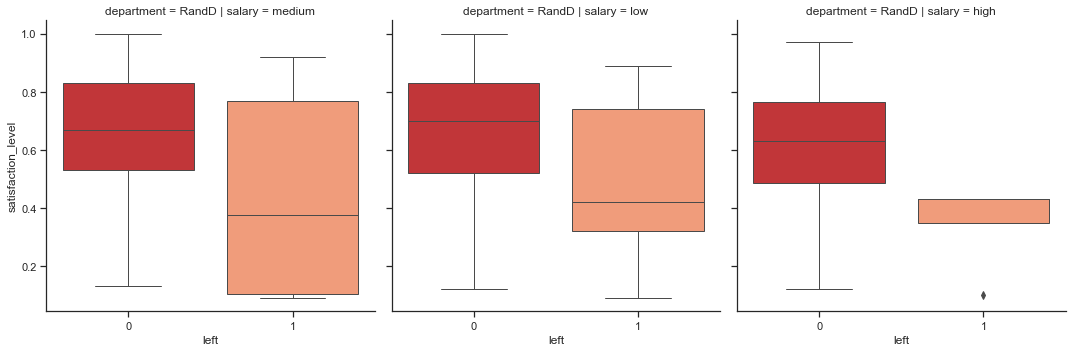

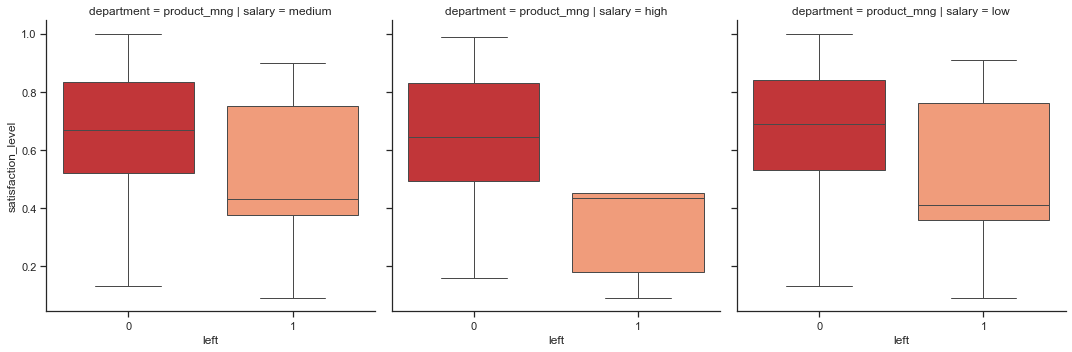

In [11]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='left', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'salary',row='department', 
                   ci=None, aspect=1, linewidth=1) 

We can now check how the various variables are correlated, and derive conclusions out of them. 

In [12]:
variable_correlations = df.corr()
variable_correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_index,salary_index
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.005346,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.020473,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.008318,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.001022,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.007325,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.004566,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.011047,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015032,0.098119
dept_index,-0.005346,0.020473,0.008318,-0.001022,0.007325,0.004566,-0.011047,0.015032,1.000000,0.061357
salary_index,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.061357,1.000000


In [13]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(11, 9))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

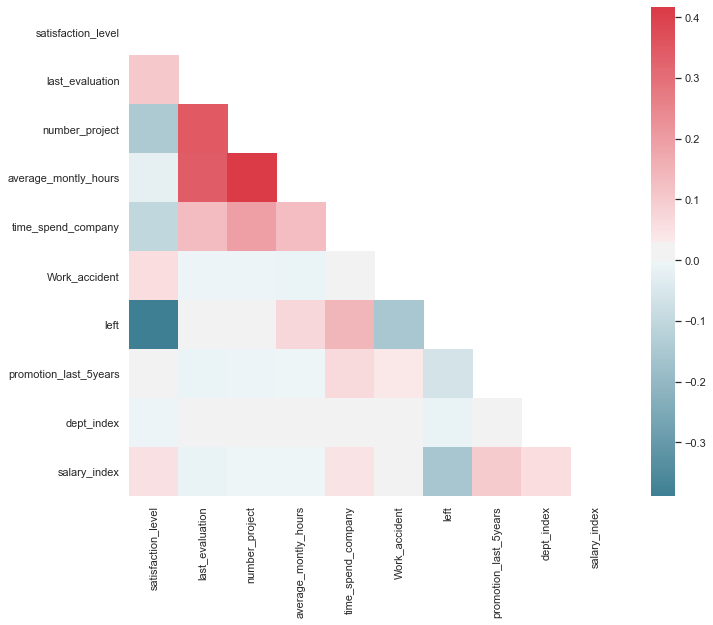

In [14]:
heat_map(variable_correlations)

This shows a very high correlation between number of projects and average monthly hours. Therefore we should plot projects done vs various departments and their salaries. 

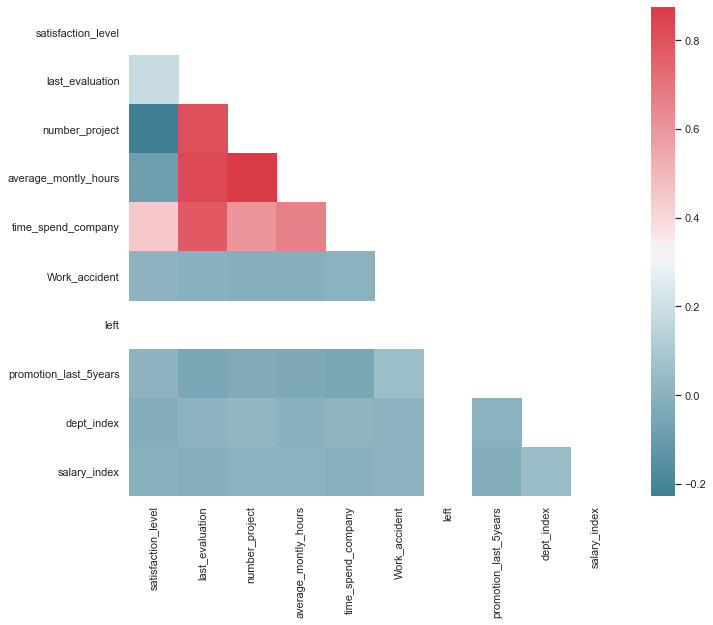

In [15]:
df_left = df[df['left']==1]
reduced_variable_correlations = df_left.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

This shows a very high correlation between number of projects and average monthly hours. Therefore we should plot projects done vs various departments and their salaries. 

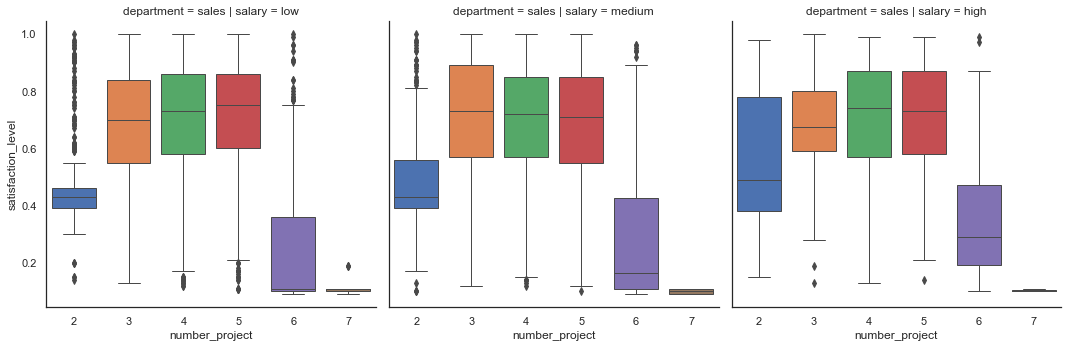

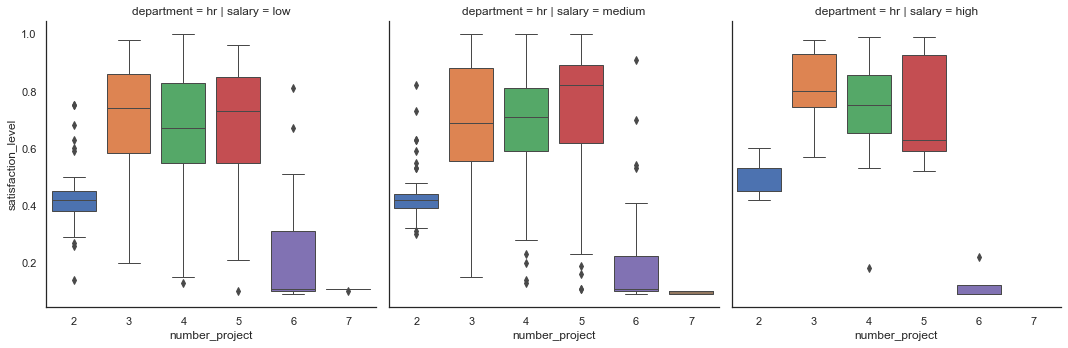

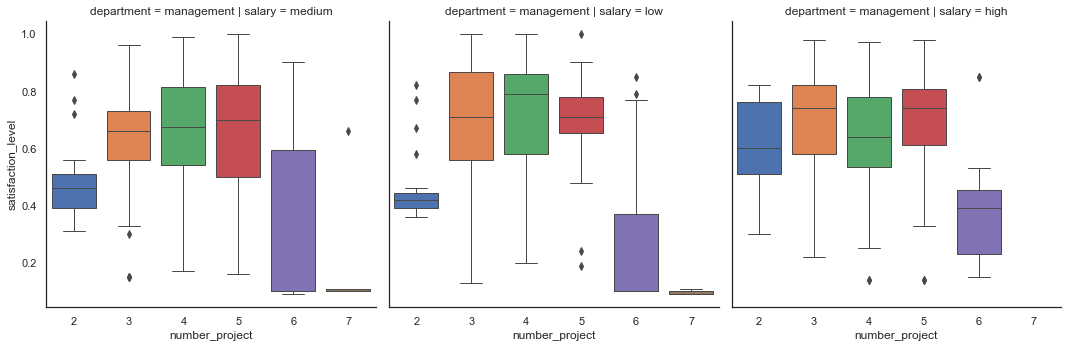

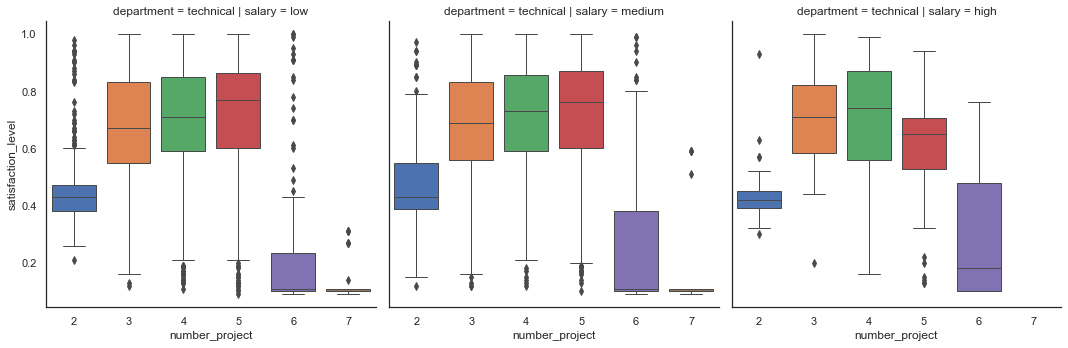

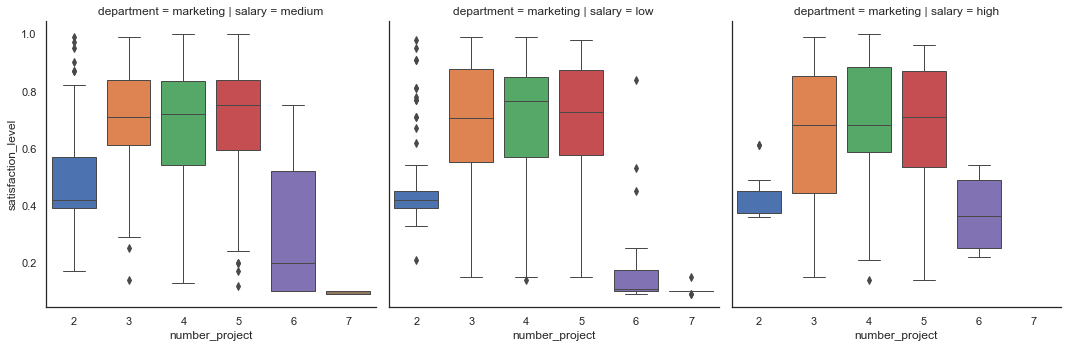

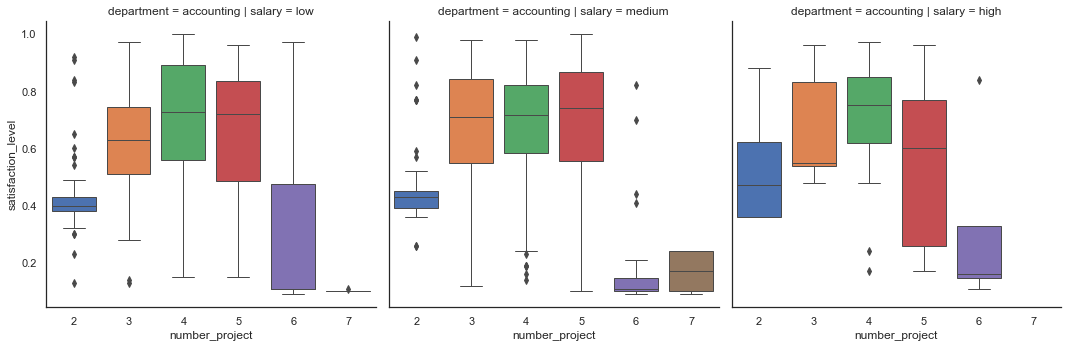

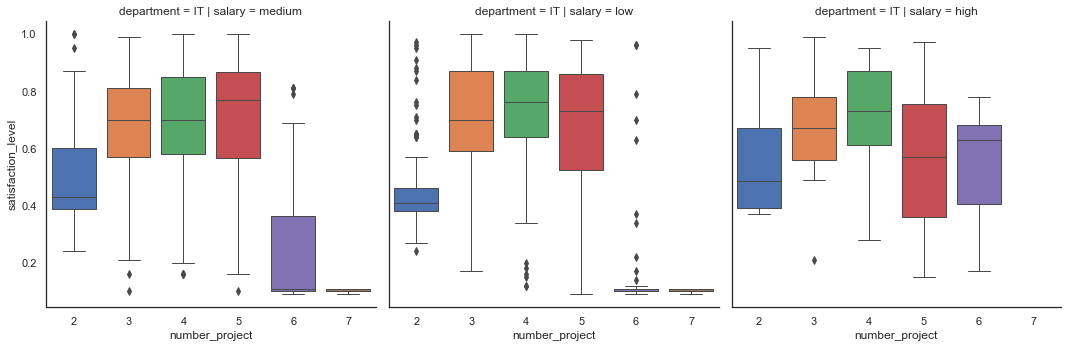

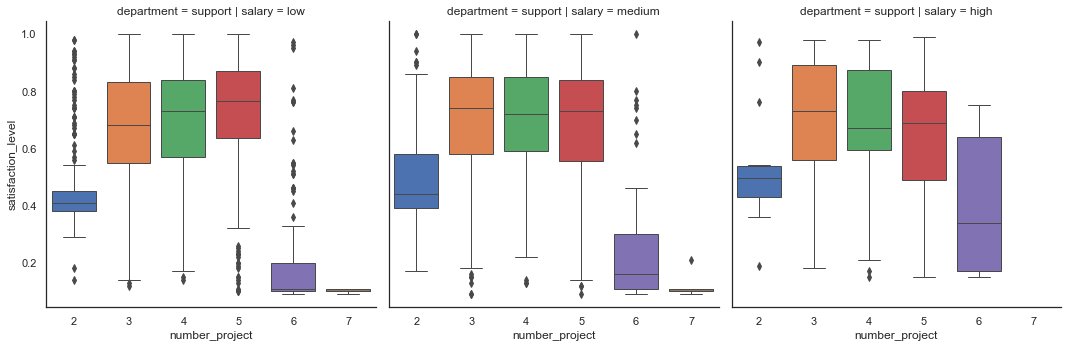

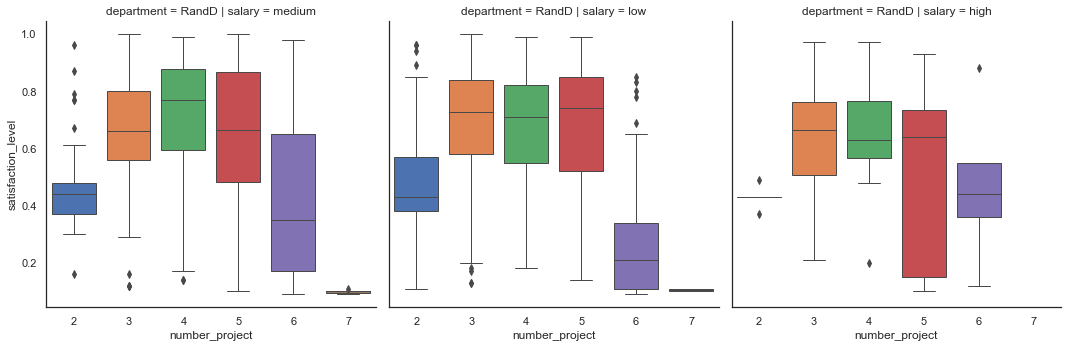

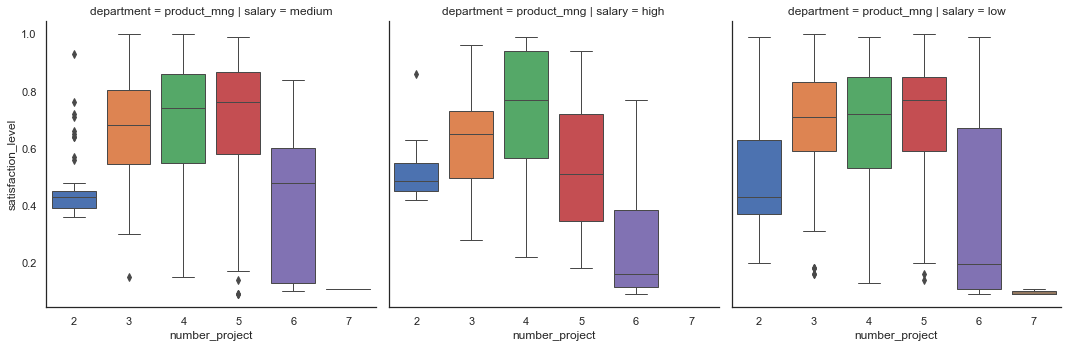

In [16]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='number_project', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'salary', row='department', 
                   ci=None, aspect=1, linewidth=1) 

It is now somewhat apparent that the sweet spot for number of projects done should be between 3 and 5. If employees don't get to work on any projects, they are not satisfied, and if they have to work on too many projects, they are again not satisfied. In fact, overworking them reduces the satisfaction very significantly. 

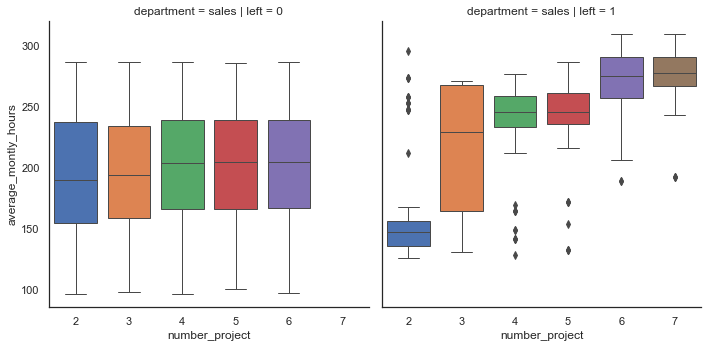

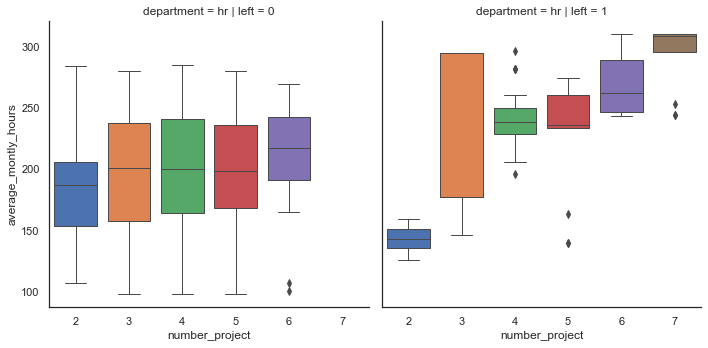

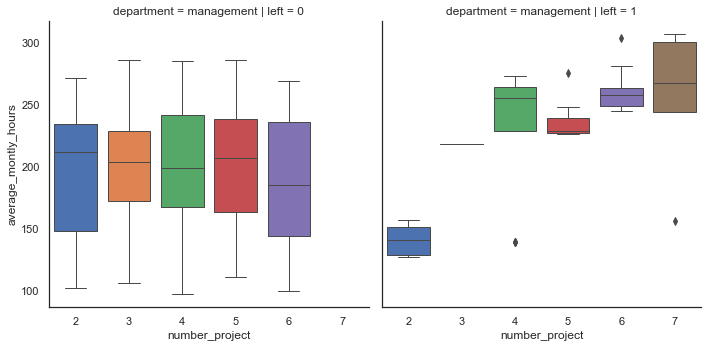

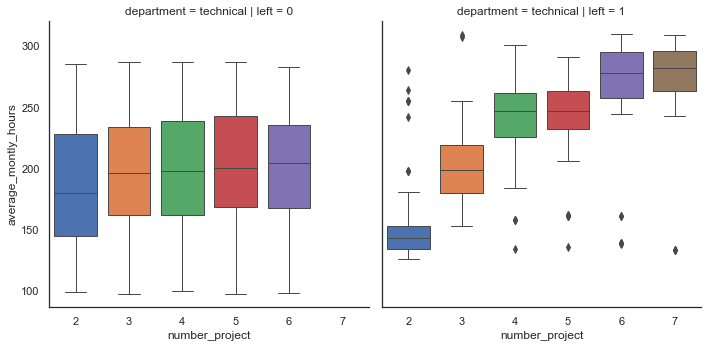

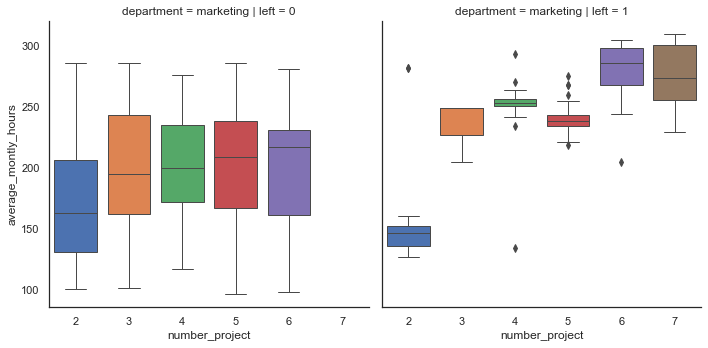

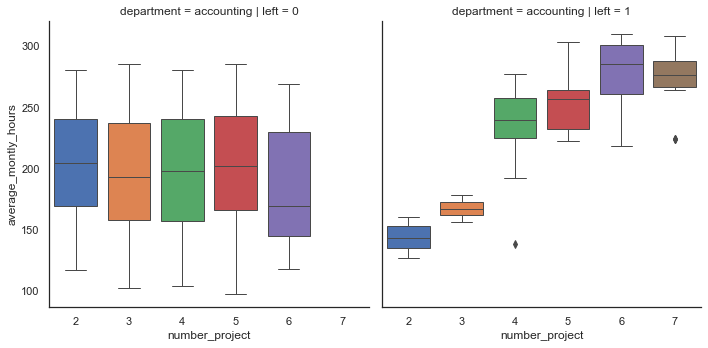

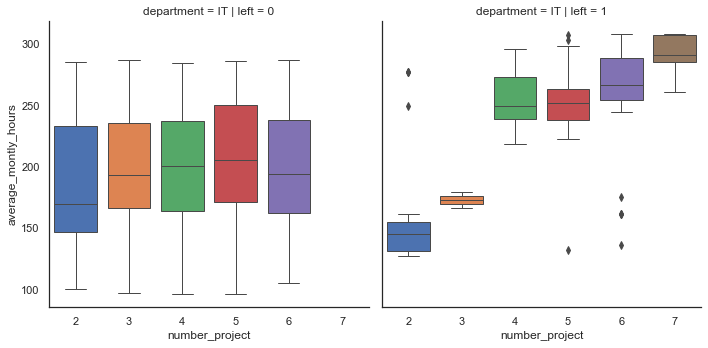

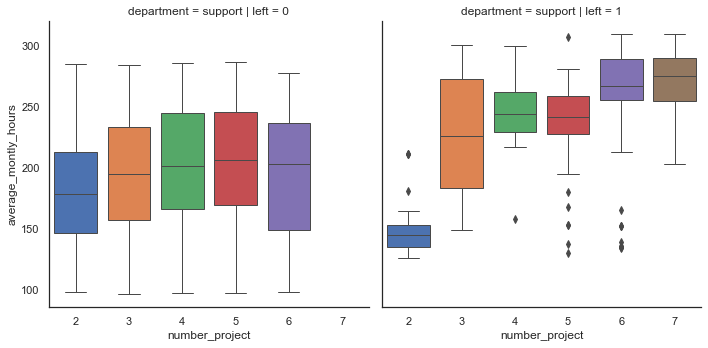

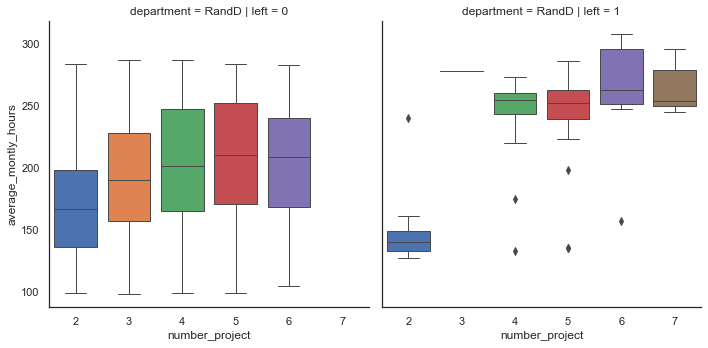

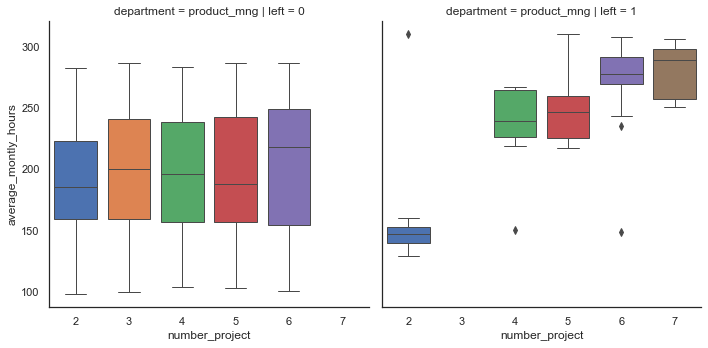

In [17]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='number_project', y="average_montly_hours",data=aa, 
                   saturation=1, kind="box", col = 'left', row='department', 
                   ci=None, aspect=1, linewidth=1) 

It seems that average monthly hours is a significant factor. The employees that left, were working a significantly more number of hours on an average compared to those who stayed. 

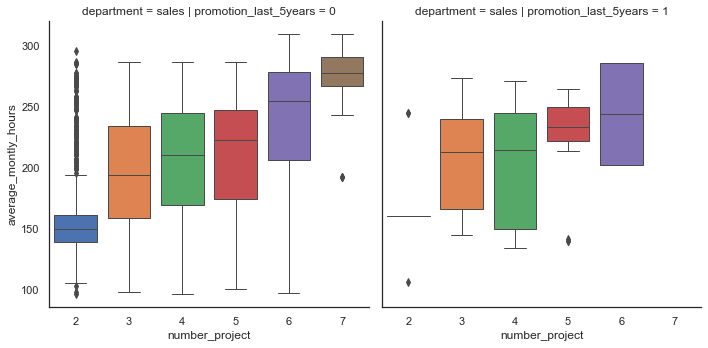

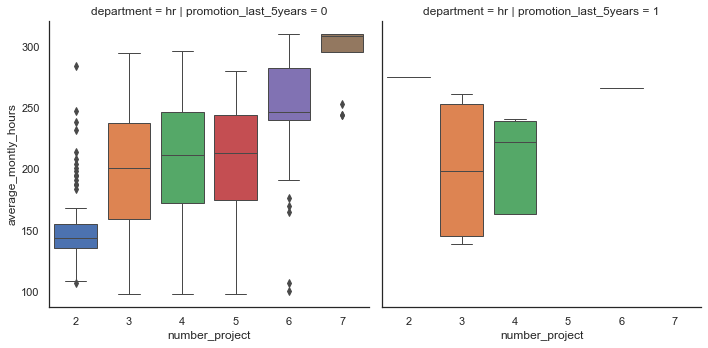

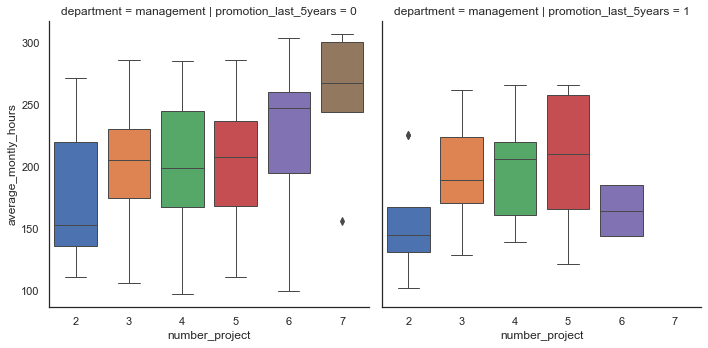

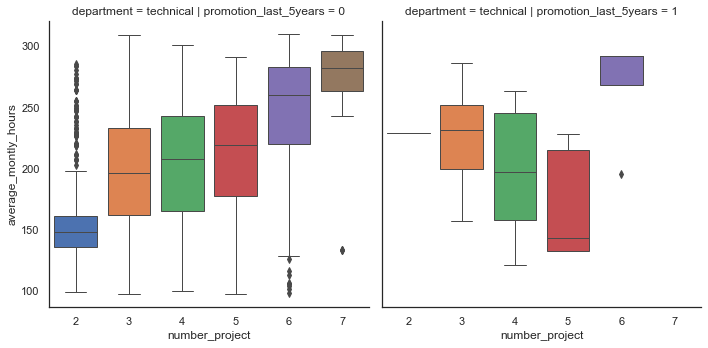

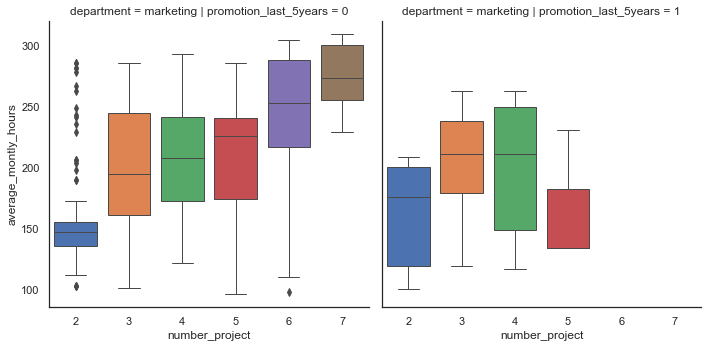

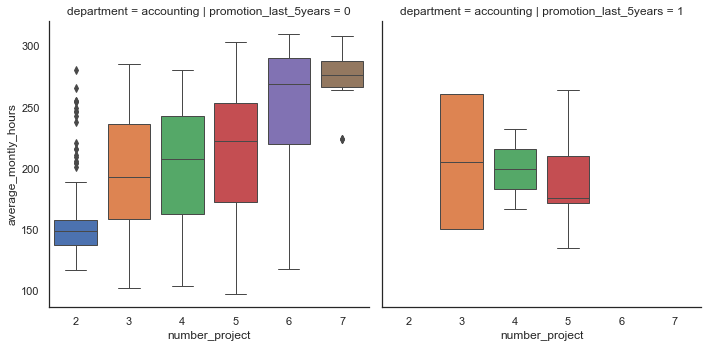

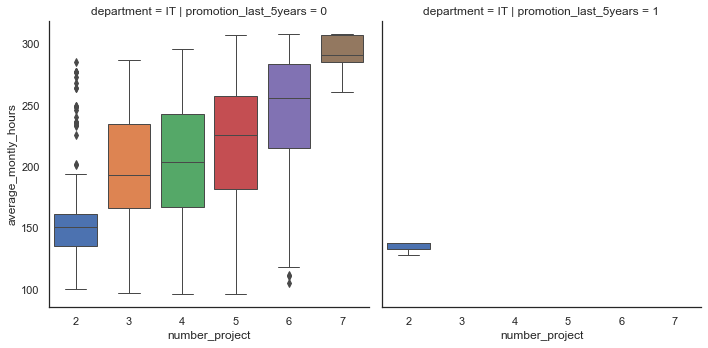

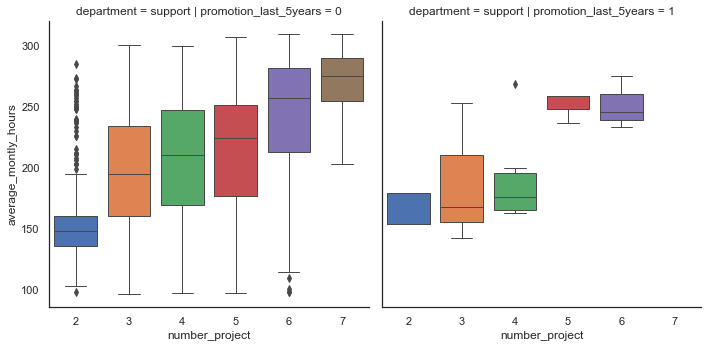

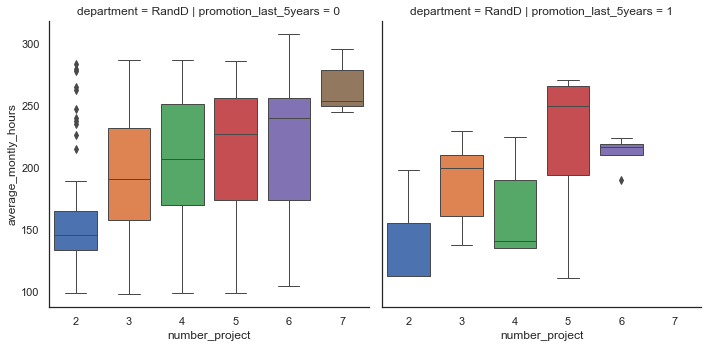

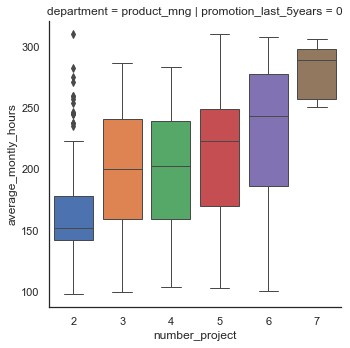

In [18]:
for i in set(df['department']):
    aa= df[df['department'].isin([i])]
    g = sns.factorplot(x='number_project', y="average_montly_hours",data=aa, 
                   saturation=1, kind="box", col = 'promotion_last_5years', row='department', 
                   ci=None, aspect=1, linewidth=1) 

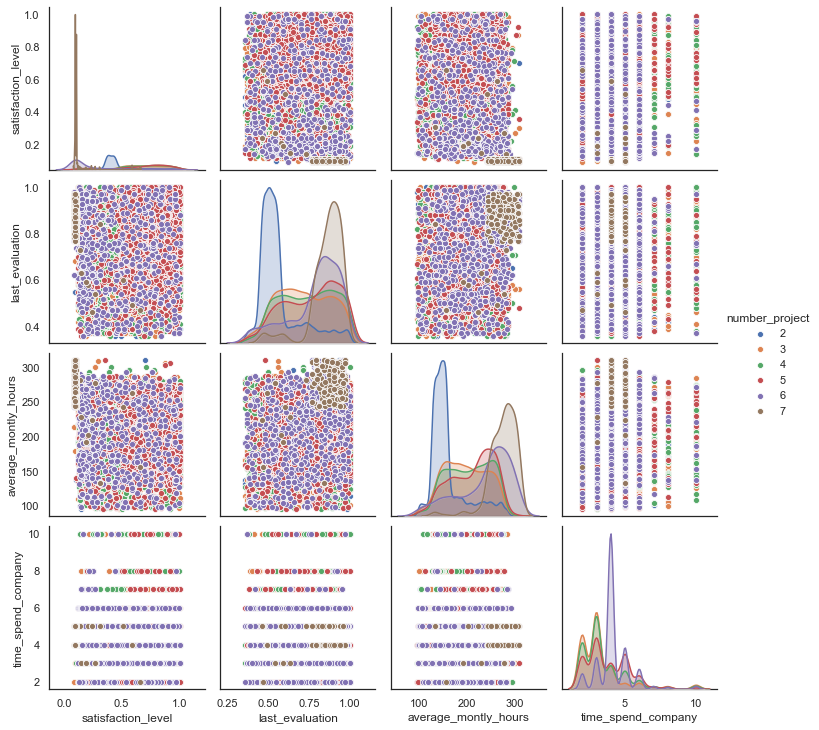

In [19]:
df_small = df[['satisfaction_level', 
                   'last_evaluation', 
                   'number_project',
                   'average_montly_hours', 
                   'time_spend_company']]
sns.pairplot(df_small, hue="number_project")

We can derive the same conclusions out of the pair plot as well. Wherever clusters exist, those clusters indicate a high correlation.  For example ~ those employees with very low satisfaction levels have very high number of hours, more than 5 projects, and because of this they have to spend a lot more hours than the normal. Although their last evaluations are high, the employees are not satisfied. 

In [25]:
#g = sns.PairGrid(df_small, diag_sharey=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)

In [26]:
df=pd.read_csv("Inputs/HR_comma_sep.csv")
df.columns = ['satisfaction_level', 
                  'last_evaluation', 
                  'number_project',
                  'average_montly_hours', 
                  'time_spend_company', 
                  'Work_accident', 
                  'left',
                  'promotion_last_5years', 
                  'department', 
                  'salary']
mod_df = df 

In [27]:
df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department', 'salary'],
      dtype=object)

In [28]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
               ('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

salary_groups = {'low': 0, 'medium': 1, 'high': 2}

department_groups = {'sales': 1, 
                     'marketing': 2, 
                     'product_mng': 3, 
                     'technical': 4, 
                     'IT': 5, 
                     'RandD': 6, 
                     'accounting': 7, 
                     'hr': 8, 
                     'support': 9, 
                     'management': 10 
                    }
mod_df.salary = mod_df.salary.map(salary_groups)

mod_df['deptgrps'] = mod_df.department.map(department_groups)

for dept in mod_df.department.unique():
    mod_df['dept_'+dept] = (mod_df.department == dept).astype(int)
mod_df = mod_df.drop('department', axis=1)

x, Y = mod_df.drop('left', axis=1), mod_df['left']
for name, classifier in classifiers:
    scores = []
    for i in range(3): 
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.9938104779938989
RandomForestClassifierE 0.9942224638010743
AdaBoostClassifier 0.9825380788334617
ExtraTreesClassifier 0.9929053943673146
KNeighborsClassifier 0.9702751687664873
DecisionTreeClassifier 0.9789676611698445
ExtraTreeClassifier 0.9639085216986203
LogisticRegression 0.8107922060553283
GaussianNB 0.8149572358414134
BernoulliNB 0.6412295865824871


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

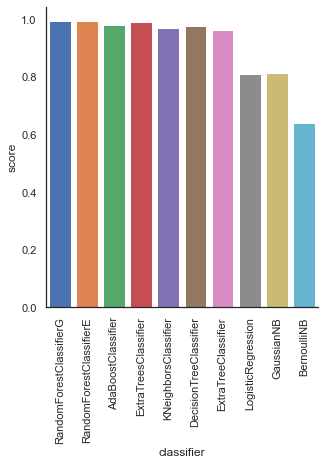

In [29]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
sns.factorplot(x='classifier', 
               y="score",data=temp, 
               saturation=1, 
               kind="bar", 
               ci=None, 
               aspect=1, 
               linewidth=1) 
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

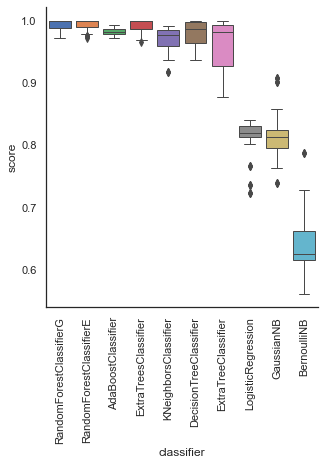

In [30]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [31]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'deptgrps',
       'dept_sales', 'dept_accounting', 'dept_hr', 'dept_technical',
       'dept_support', 'dept_management', 'dept_IT', 'dept_product_mng',
       'dept_marketing', 'dept_RandD'],
      dtype='object')

In [32]:
x, Y = mod_df.drop('left', axis=1), mod_df['left']
for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.9938072819164693
RandomForestClassifierE 0.9940720559320795
AdaBoostClassifier 0.9825380788334617
ExtraTreesClassifier 0.992941306652306
KNeighborsClassifier 0.9702751687664873
DecisionTreeClassifier 0.9788363892018824
ExtraTreeClassifier 0.9627735846642392
LogisticRegression 0.8107922060553283
GaussianNB 0.8149572358414134
BernoulliNB 0.6412295865824871


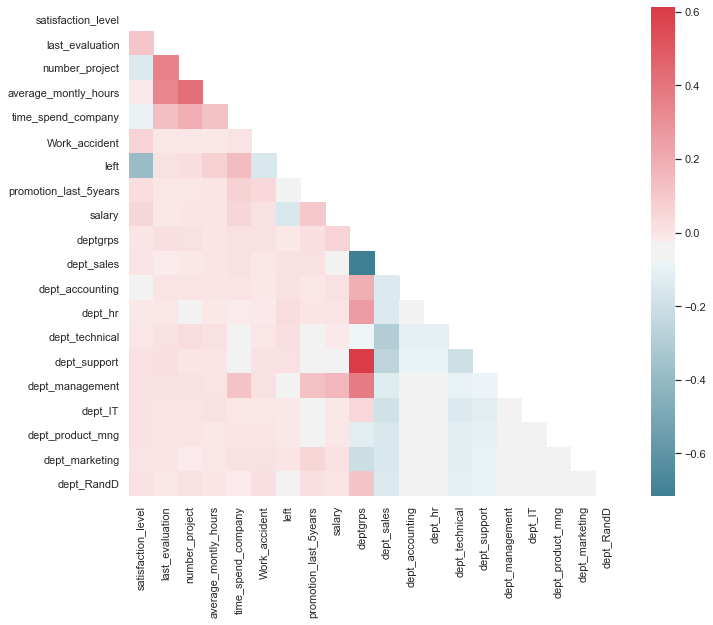

In [33]:
reduced_variable_correlations = mod_df.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

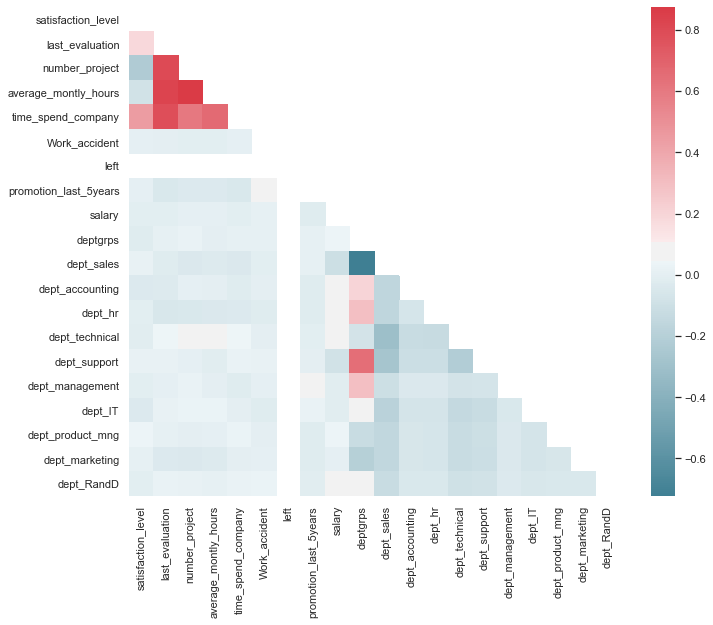

In [34]:
mod_df_left = mod_df[mod_df['left']==1]
reduced_variable_correlations = mod_df_left.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

We can see now, that by splitting things into various departments, one can see that the things are not common at all places. Some departments need more work on one aspect over the other. 

In [35]:
x, Y = mod_df.drop('promotion_last_5years', axis=1), mod_df['promotion_last_5years']
for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.8960767200272479
RandomForestClassifierE 0.8938848206176203
AdaBoostClassifier 0.7911939430063578
ExtraTreesClassifier 0.8869231096730245
KNeighborsClassifier 0.8417505392824706
DecisionTreeClassifier 0.8501717188919166
ExtraTreeClassifier 0.8525431425976386
LogisticRegression 0.7825479677565851
GaussianNB 0.7788930517711171
BernoulliNB 0.799111177338783


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

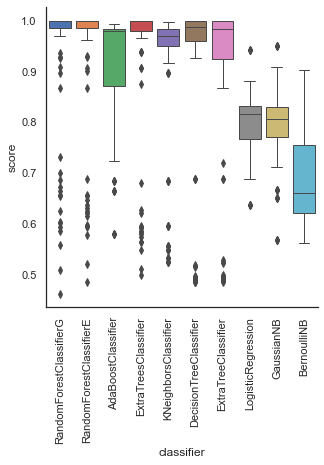

In [36]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)